# 1. Know The Data

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Import Libraries

In [2]:
import numpy as np

import pandas as pd



import matplotlib.pyplot as plt

import seaborn as sns



from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report



from sklearn.preprocessing import LabelEncoder



# Import model selection libraries

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, RepeatedStratifiedKFold



# Library used for ML Model implementation

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.naive_bayes import GaussianNB

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier



# Library used for ignore warnings

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

## Dataset Loading

In [3]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

## Data First View

In [4]:
# Dataset First Look

# View top 5 rews of the dataset

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dataset Row & Columns count

In [5]:
print("Number of rows are: ", df.shape[0])

print("Number of columns are: ", df.shape[1])

Number of rows are:  150
Number of columns are:  6


## Dataset Infnormation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Duplicate Values

In [7]:
dup = df.duplicated().sum()

print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


## Missing Values/Null Values

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## What did i know about the dataset?

# 2. Understanding The Variables

In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df.describe(include= 'all').round(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.00,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.50,5.84,3.05,3.76,1.20,NaN
std,43.45,0.83,0.43,1.76,0.76,NaN
min,1.00,4.30,2.00,1.00,0.10,NaN
25%,38.25,5.10,2.80,1.60,0.30,NaN
50%,75.50,5.80,3.00,4.35,1.30,NaN
75%,112.75,6.40,3.30,5.10,1.80,NaN


## Check Unique Values for each variable.

In [11]:
for i in df.columns.tolist():

    print("No. of unique values in ", i, "is ", df[i].nunique())

No. of unique values in  Id is  150
No. of unique values in  SepalLengthCm is  35
No. of unique values in  SepalWidthCm is  23
No. of unique values in  PetalLengthCm is  43
No. of unique values in  PetalWidthCm is  22
No. of unique values in  Species is  3


# 3. Data Wrangling

## Data Wrangling Code

In [12]:
data = df.iloc[:, 1:]

In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

Chart - 1 : Distribution of Numerical Variables

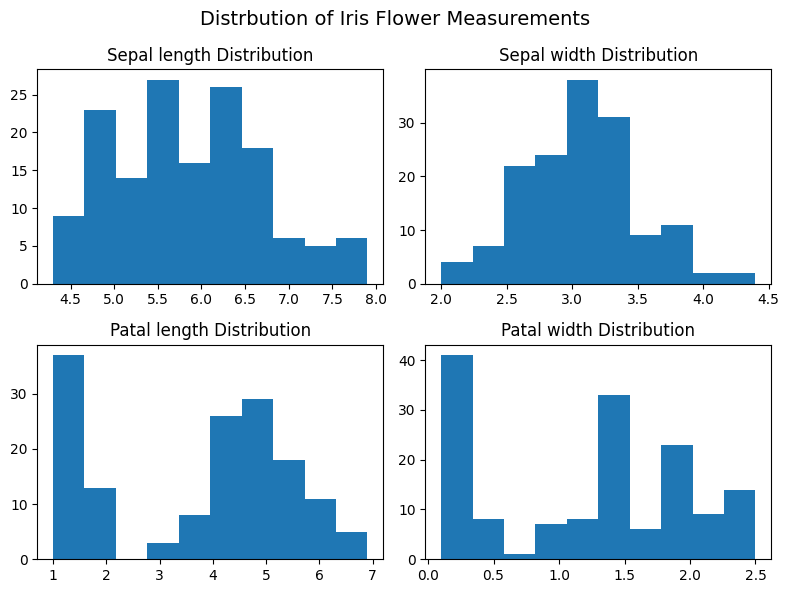

In [14]:
plt.figure(figsize=(8, 6))

plt.suptitle('Distrbution of Iris Flower Measurements', fontsize = 14)



plt.subplot(2,2,1)

plt.hist(data['SepalLengthCm'])

plt.title('Sepal length Distribution')



plt.subplot(2,2,2)

plt.hist(data['SepalWidthCm'])

plt.title('Sepal width Distribution')



plt.subplot(2,2,3)

plt.hist(data['PetalLengthCm'])

plt.title('Patal length Distribution')



plt.subplot(2,2,4)

plt.hist(data['PetalWidthCm'])

plt.title('Patal width Distribution')



plt.tight_layout()

plt.show()

Chart - 2: Sepal Length vs epal Width

In [15]:
colors = ['red', 'yellow', 'green']

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

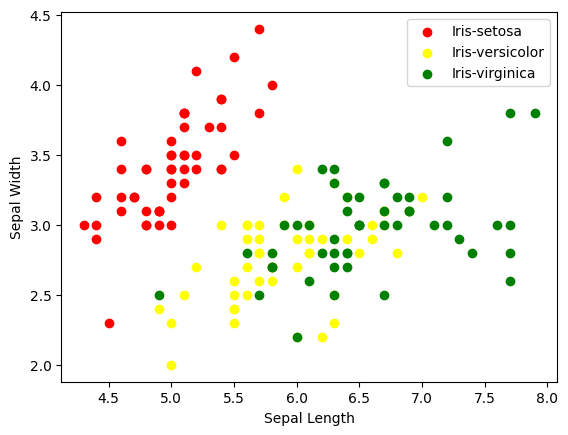

In [16]:
# Chart - 2 Scatter plot visualization code for Sepal Length vs Sepal Width.

# Create a scatter plot for Sepal Length vs Sepal Width for each species.

for i in range(3):

    # Select data for the current species.

    x = data[data['Species'] == species[i]]



    # Create a scatter plot with the specified color and label for the current species.

    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])



# Add labels to the x and y axes.

plt.xlabel('Sepal Length')

plt.ylabel('Sepal Width')



# Add a legend to identify species based on colors.

plt.legend()



# Display the scatter plot.

plt.show()

Chart - 3: Petal Length vs Petal Width

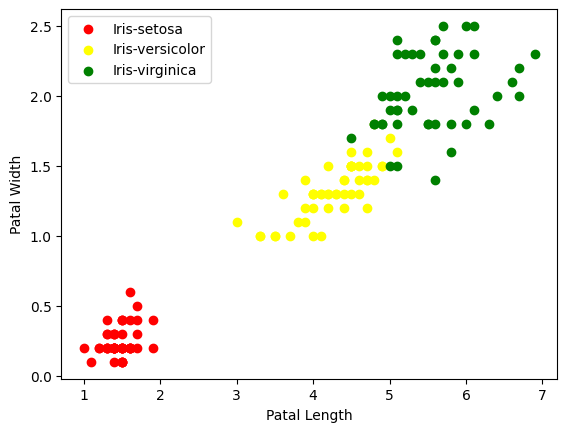

In [17]:
for i in range(3):

    x = data[data['Species'] == species[i]]



    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])

plt.xlabel("Patal Length")

plt.ylabel("Patal Width")



plt.legend()

plt.show()

Chart - 4: Sepal Length vs Petal Length

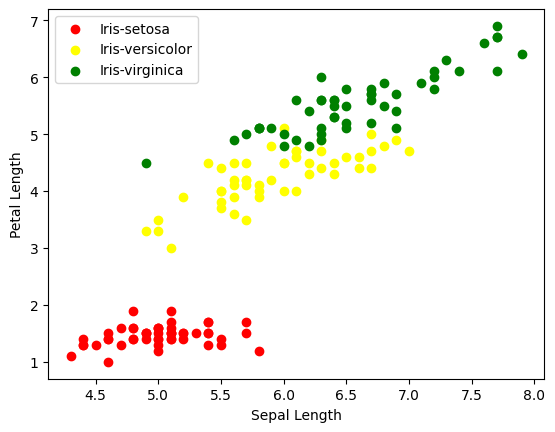

In [18]:
for i in range(3):



    x = data[data['Species'] == species[i]]



    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c = colors[i], label = species[i])



plt.xlabel('Sepal Length')

plt.ylabel('Petal Length')

plt.legend()

plt.show()

Chart - 5 : Sepal Width vs Petal Width

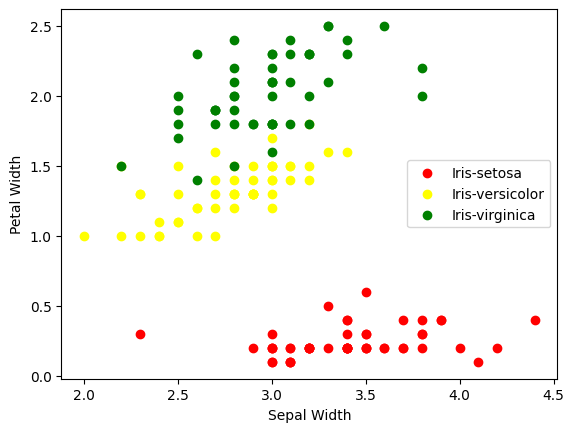

In [19]:
for i in range(3):



    x = data[data['Species'] == species[i]]



    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], c = colors[i], label = species[i])



plt.xlabel('Sepal Width')

plt.ylabel('Petal Width')

plt.legend()

plt.show()

Chart - 6: Correlaton Heatmap

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [21]:
data1 = data.drop('Species', axis= 1)

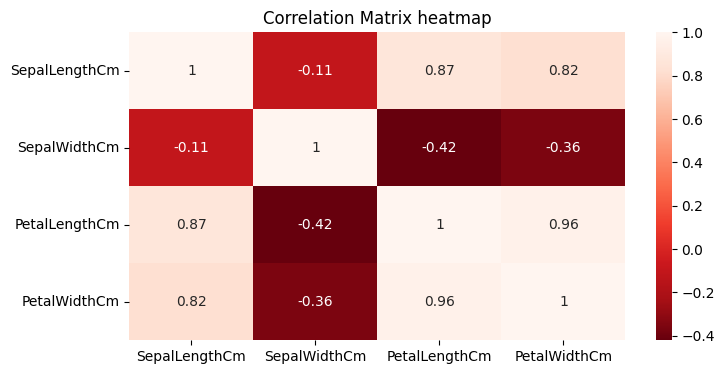

In [22]:
# Correlation Heatmap Visualization Code

corr_matrix = data1.corr()



# Plot Heatmap

plt.figure(figsize=(8, 4))

sns.heatmap(corr_matrix, annot=True, cmap='Reds_r')



# Setting Labels

plt.title('Correlation Matrix heatmap')



# Display Chart

plt.show()

# 5. Feature Engineering & Data Pre-processing

## 1. Categorical Encoding

In [23]:
le = LabelEncoder()

data['Species'] = le.fit_transform(data['Species'])



unique_species = data['Species'].unique()



print("Encoded Species Values: ")

print(unique_species)

Encoded Species Values: 
[0 1 2]


## 2. Data Scaling

In [24]:
x=data.drop(columns=['Species'], axis=1)

y=data['Species']

## 3. Data Splitting

In [25]:


# Splitting the data to train and test

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [26]:
y_train.value_counts()

Species
0    38
1    34
2    33
Name: count, dtype: int64

# 6. ML Model Implementation

In [27]:
def evaluate_model(model, x_train, x_test, y_train, y_test):

    '''The function will take model, x train, x test, y train, y test

    and then it will fit the model, then make predictions on the trained model,

    it will then print roc-auc score of train and test, then plot the roc, auc curve,

    print confusion matrix for train and test, then print classification report for train and test,

    then plot the feature importances if the model has feature importances,

    and finally it will return the following scores as a list:

    recall_train, recall_test, acc_train, acc_test, F1_train, F1_test

    '''



    # Fit the model to the training data.

    model.fit(x_train, y_train)



    # make predictions on the test data

    y_pred_train = model.predict(x_train)

    y_pred_test = model.predict(x_test)



    # calculate confusion matrix

    cm_train = confusion_matrix(y_train, y_pred_train)

    cm_test = confusion_matrix(y_test, y_pred_test)



    fig, ax = plt.subplots(1, 2, figsize=(11,4))



    print("\nConfusion Matrix:")

    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])

    ax[0].set_xlabel("Predicted Label")

    ax[0].set_ylabel("True Label")

    ax[0].set_title("Train Confusion Matrix")



    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])

    ax[1].set_xlabel("Predicted Label")

    ax[1].set_ylabel("True Label")

    ax[1].set_title("Test Confusion Matrix")



    plt.tight_layout()

    plt.show()





    # calculate classification report

    cr_train = classification_report(y_train, y_pred_train, output_dict=True)

    cr_test = classification_report(y_test, y_pred_test, output_dict=True)

    print("\nTrain Classification Report:")

    crt = pd.DataFrame(cr_train).T

    print(crt.to_markdown())

    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")

    print("\nTest Classification Report:")

    crt2 = pd.DataFrame(cr_test).T

    print(crt2.to_markdown())

    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")



    precision_train = cr_train['weighted avg']['precision']

    precision_test = cr_test['weighted avg']['precision']



    recall_train = cr_train['weighted avg']['recall']

    recall_test = cr_test['weighted avg']['recall']



    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)

    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)



    F1_train = cr_train['weighted avg']['f1-score']

    F1_test = cr_test['weighted avg']['f1-score']



    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test ]

    return model_score

In [28]:
# Create a score dataframe

score = pd.DataFrame(index = ['Precision Train', 'Precision Test','Recall Train','Recall Test','Accuracy Train', 'Accuracy Test', 'F1 macro Train', 'F1 macro Test'])

     

## ML Model - 1: Logisic Regression

In [29]:


# ML Model - 1 Implementation

lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [30]:
! pip install tabulate


Confusion Matrix:


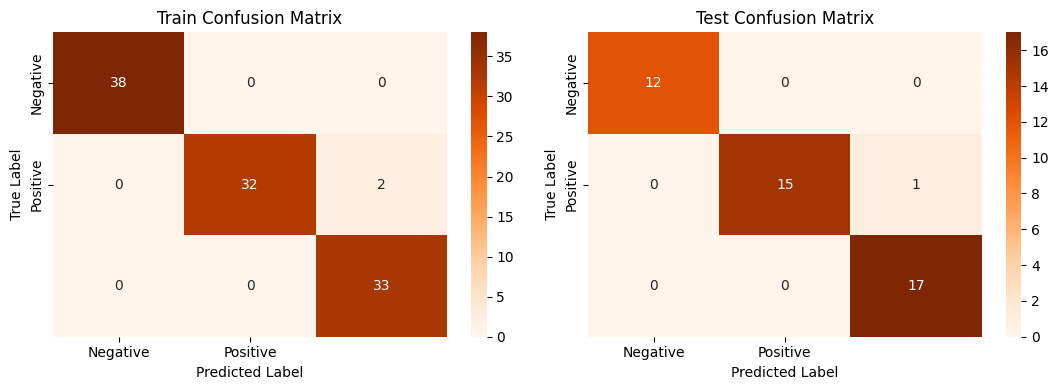


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    1        | 0.941176 |   0.969697 |  34        |
| 2            |    0.942857 | 1        |   0.970588 |  33        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980952 | 0.980392 |   0.980095 | 105        |
| weighted avg |    0.982041 | 0.980952 |   0.980944 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [31]:
# Visualizing evaluation Metric Score chart

lr_score = evaluate_model(lr_model, x_train, x_test, y_train, y_test)

In [32]:
# Updated Evaluation metric Score Chart

score['Logistic regression'] = lr_score

score

,Logistic regression
Precision Train,0.982041
Precision Test,0.979012
Recall Train,0.980952
Recall Test,0.977778
Accuracy Train,0.980952
Accuracy Test,0.977778
F1 macro Train,0.980944
F1 macro Test,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [33]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],

              'penalty': ['l1', 'l2'],

              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}



# Initializing the logistic regression model

logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)



# Repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)



# Using GridSearchCV to tune the hyperparameters using cross-validation

grid = GridSearchCV(logreg, param_grid, cv=rskf)

grid.fit(x_train, y_train)



# Select the best hyperparameters found by GridSearchCV

best_params = grid.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}


In [34]:
# Initiate model with best parameters

lr_model2 = LogisticRegression(C=best_params['C'],

                                  penalty=best_params['penalty'],

                                  solver=best_params['solver'],

                                  max_iter=10000, random_state=0)


Confusion Matrix:


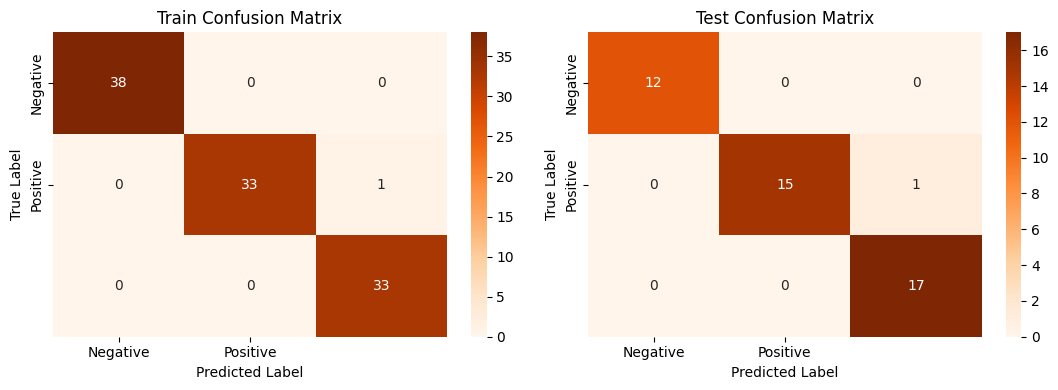


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    1        | 0.970588 |   0.985075 |  34        |
| 2            |    0.970588 | 1        |   0.985075 |  33        |
| accuracy     |    0.990476 | 0.990476 |   0.990476 |   0.990476 |
| macro avg    |    0.990196 | 0.990196 |   0.99005  | 105        |
| weighted avg |    0.990756 | 0.990476 |   0.990476 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [35]:
# Visualizing evaluation Metric Score chart

lr_score2 = evaluate_model(lr_model2, x_train, x_test, y_train, y_test)

In [36]:


score['Logistic regression tuned'] = lr_score2

In [37]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned
Precision Train,0.982041,0.990756
Precision Test,0.979012,0.979012
Recall Train,0.980952,0.990476
Recall Test,0.977778,0.977778
Accuracy Train,0.980952,0.990476
Accuracy Test,0.977778,0.977778
F1 macro Train,0.980944,0.990476
F1 macro Test,0.977737,0.977737


## ML Model - 2 : Decision Tree

In [38]:
# ML Model - 2 Implementation

dt_model = DecisionTreeClassifier(random_state=20)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


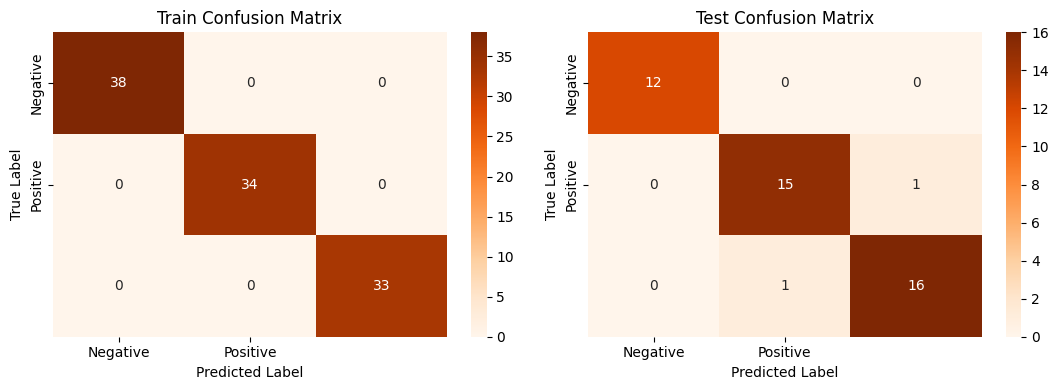


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        38 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    0.9375   | 0.9375   |   0.9375   | 16        |
| 2            |    0.941176 | 0.941176 |   0.941176 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.955556 |
| m

In [39]:
# Visualizing evaluation Metric Score chart

dt_score = evaluate_model(dt_model, x_train, x_test, y_train, y_test)

In [40]:
# Updated Evaluation metric Score Chart

score['Decision Tree'] = dt_score

score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.982041,0.990756,1.000000
Precision Test,0.979012,0.979012,0.955556
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.955556
F1 macro Train,0.980944,0.990476,1.000000
F1 macro Test,0.977737,0.977737,0.955556


### 2. Cross- Validation & Hyperparameter Tuning

In [41]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

grid = {'max_depth' : [3,4,5,6,7,8],

        'min_samples_split' : np.arange(2,8),

        'min_samples_leaf' : np.arange(10,20)}



# Initialize the model

model = DecisionTreeClassifier()



# repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)



# Initialize GridSearchCV

grid_search = GridSearchCV(model, grid, cv=rskf)



# Fit the GridSearchCV to the training data

grid_search.fit(x_train, y_train)



# Select the best hyperparameters

best_params = grid_search.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 3}


In [42]:
# Train a new model with the best hyperparameters

dt_model2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],

                                 min_samples_leaf=best_params['min_samples_leaf'],

                                 min_samples_split=best_params['min_samples_split'],

                                 random_state=20)


Confusion Matrix:


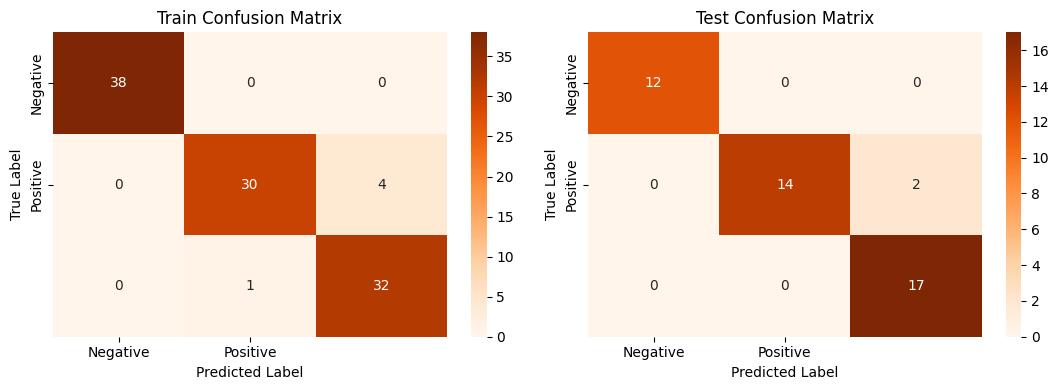


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.967742 | 0.882353 |   0.923077 |  34        |
| 2            |    0.888889 | 0.969697 |   0.927536 |  33        |
| accuracy     |    0.952381 | 0.952381 |   0.952381 |   0.952381 |
| macro avg    |    0.95221  | 0.950683 |   0.950204 | 105        |
| weighted avg |    0.954634 | 0.952381 |   0.952317 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.875    |   0.933333 | 16        |
| 2            |    0.894737 | 1        |   0.944444 | 17        |
| accuracy     |    0.955556 | 0.955556 |   0.955556 |  0.9555

In [43]:
# Visualizing evaluation Metric Score chart

dt2_score = evaluate_model(dt_model2, x_train, x_test, y_train, y_test)

In [44]:


# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree
Precision Train,0.982041,0.990756,1.000000
Precision Test,0.979012,0.979012,0.955556
Recall Train,0.980952,0.990476,1.000000
Recall Test,0.977778,0.977778,0.955556
Accuracy Train,0.980952,0.990476,1.000000
Accuracy Test,0.977778,0.977778,0.955556
F1 macro Train,0.980944,0.990476,1.000000
F1 macro Test,0.977737,0.977737,0.955556


## ML Model - 3 : Random Forest

In [45]:
# ML Model - 3 Implementation

rf_model = RandomForestClassifier(random_state=0)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


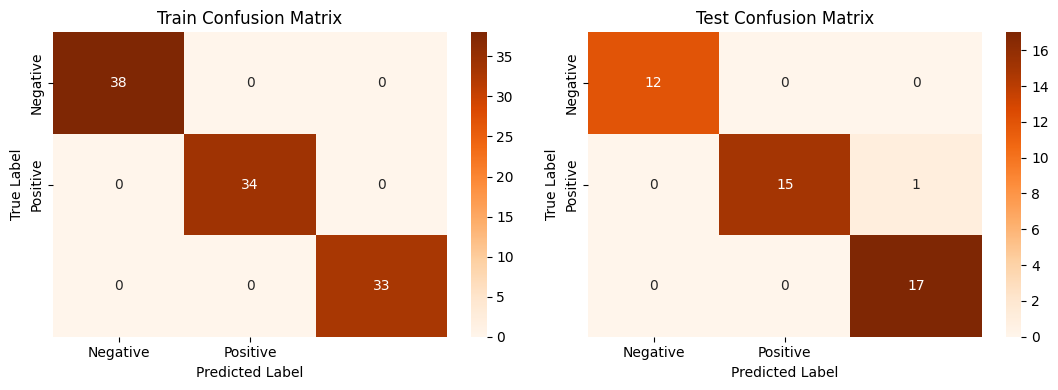


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        38 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [46]:
# Visualizing evaluation Metric Score chart

rf_score = evaluate_model(rf_model, x_train, x_test, y_train, y_test)

In [47]:
# Updated Evaluation metric Score Chart

score['Random Forest'] = rf_score

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest
Precision Train,0.982041,0.990756,1.000000,1.000000
Precision Test,0.979012,0.979012,0.955556,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000
F1 macro Test,0.977737,0.977737,0.955556,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

grid = {'n_estimators': [10, 50, 100, 200],

              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],

              'min_samples_split': [2, 3, 4, 5]}



# Initialize the model

rf = RandomForestClassifier(random_state=0)



# Repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)



# Initialize RandomSearchCV

random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)



# Fit the RandomSearchCV to the training data

random_search.fit(x_train, y_train)



# Select the best hyperparameters

best_params = random_search.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 4, 'max_depth': 8}


In [49]:
# Initialize model with best parameters

rf_model2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],

                                 min_samples_leaf= best_params['min_samples_split'],

                                 max_depth = best_params['max_depth'],

                                 random_state=0)


Confusion Matrix:


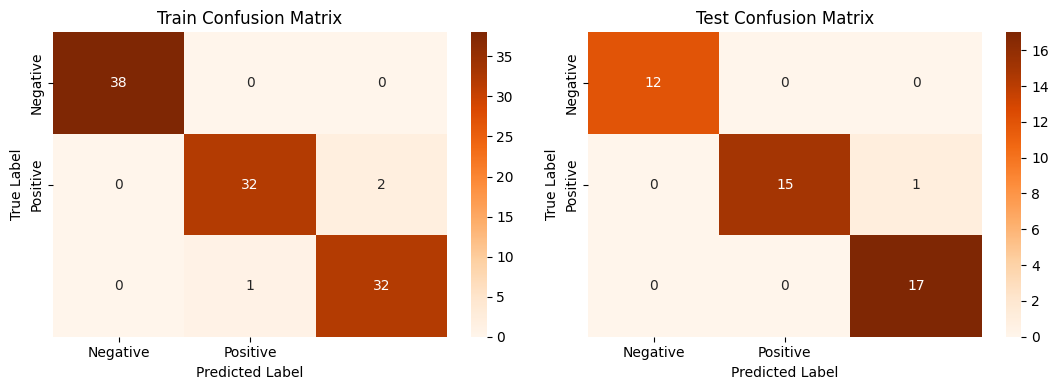


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.969697 | 0.941176 |   0.955224 |  34        |
| 2            |    0.941176 | 0.969697 |   0.955224 |  33        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.970291 | 0.970291 |   0.970149 | 105        |
| weighted avg |    0.9717   | 0.971429 |   0.971429 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [50]:
# Visualizing evaluation Metric Score chart

rf2_score = evaluate_model(rf_model2, x_train, x_test, y_train, y_test)

In [51]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest
Precision Train,0.982041,0.990756,1.000000,1.000000
Precision Test,0.979012,0.979012,0.955556,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000
F1 macro Test,0.977737,0.977737,0.955556,0.977737


## ML Model - 4 : SVM (Support Vector Machine)

In [52]:
# ML Model - 4 Implementation

svm_model = SVC(kernel='linear', random_state=0, probability=True)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


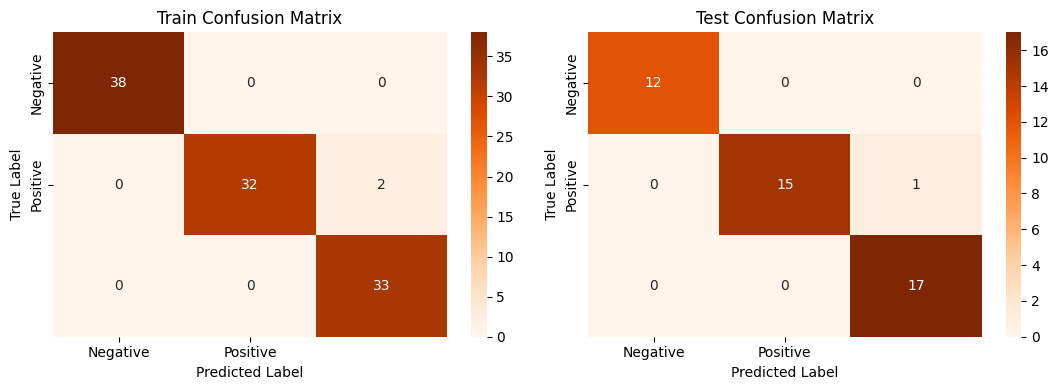


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    1        | 0.941176 |   0.969697 |  34        |
| 2            |    0.942857 | 1        |   0.970588 |  33        |
| accuracy     |    0.980952 | 0.980952 |   0.980952 |   0.980952 |
| macro avg    |    0.980952 | 0.980392 |   0.980095 | 105        |
| weighted avg |    0.982041 | 0.980952 |   0.980944 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [53]:
# Visualizing evaluation Metric Score chart

svm_score = evaluate_model(svm_model, x_train, x_test, y_train, y_test)

In [54]:
# Updated Evaluation metric Score Chart

score['SVM'] = svm_score

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

param_grid = {'C': np.arange(0.1, 10, 0.1),

              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],

              'degree': np.arange(2, 6, 1)}



# Initialize the model

svm = SVC(random_state=0, probability=True)



# Repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)



# Initialize RandomizedSearchCV with kfold cross-validation

random_search = RandomizedSearchCV(svm, param_grid, n_iter=10, cv=rskf, n_jobs=-1)



# Fit the RandomizedSearchCV to the training data

random_search.fit(x_train, y_train)



# Select the best hyperparameters

best_params = random_search.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'kernel': 'linear', 'degree': 4, 'C': 4.8}


In [56]:
# Initialize model with best parameters

svm_model2 = SVC(C = best_params['C'],

           kernel = best_params['kernel'],

           degree = best_params['degree'],

           random_state=0, probability=True)


Confusion Matrix:


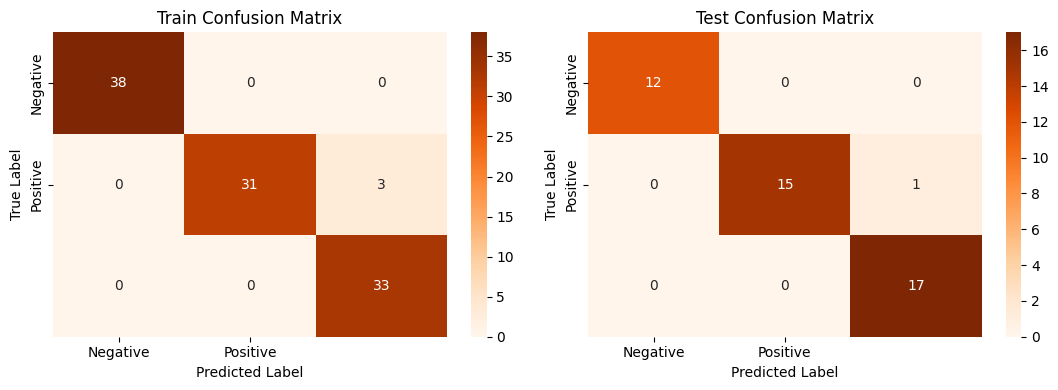


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    1        | 0.911765 |   0.953846 |  34        |
| 2            |    0.916667 | 1        |   0.956522 |  33        |
| accuracy     |    0.971429 | 0.971429 |   0.971429 |   0.971429 |
| macro avg    |    0.972222 | 0.970588 |   0.970123 | 105        |
| weighted avg |    0.97381  | 0.971429 |   0.97139  | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [57]:
# Visualizing evaluation Metric Score chart

svm2_score = evaluate_model(svm_model2, x_train, x_test, y_train, y_test)

In [58]:
score['SVM tuned'] = svm2_score

In [59]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737


## ML Model - 5 : Xtreme Gradient Boosting

In [60]:
# ML Model - 5 Implementation

xgb_model = xgb.XGBClassifier()

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


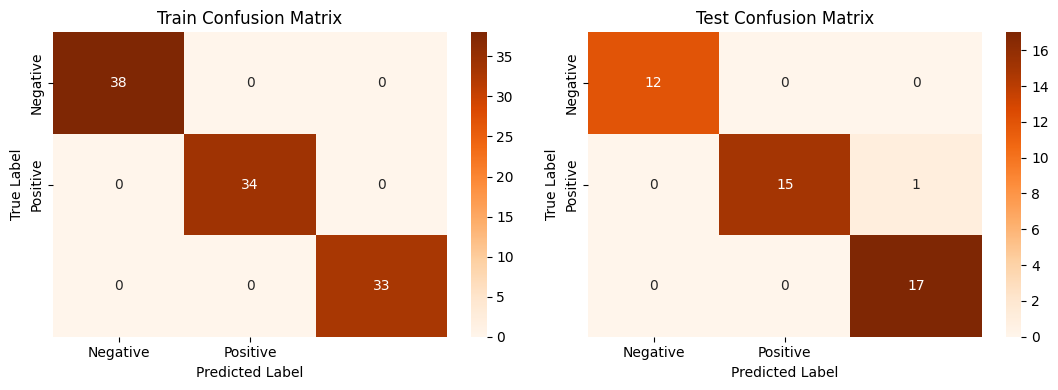


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        38 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [61]:
# Visualizing evaluation Metric Score chart

xgb_score = evaluate_model(xgb_model, x_train, x_test, y_train, y_test)

In [62]:
# Updated Evaluation metric Score Chart

score['XGB'] = xgb_score

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),

              'max_depth': np.arange(3, 15, 1),

              'n_estimators': np.arange(100, 200, 10)}



# Initialize the model

xgb2 = xgb.XGBClassifier(random_state=0)



# Repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)



# Initialize RandomizedSearchCV

random_search = RandomizedSearchCV(xgb2, param_grid, n_iter=10, cv=rskf)



# Fit the RandomizedSearchCV to the training data

random_search.fit(x_train, y_train)



# Select the best hyperparameters

best_params = random_search.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'n_estimators': 110, 'max_depth': 3, 'learning_rate': 0.22}


In [64]:
# Initialize model with best parameters

xgb_model2 = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],

                                 max_depth = best_params['max_depth'],

                               n_estimators = best_params['n_estimators'],

                                 random_state=0)


Confusion Matrix:


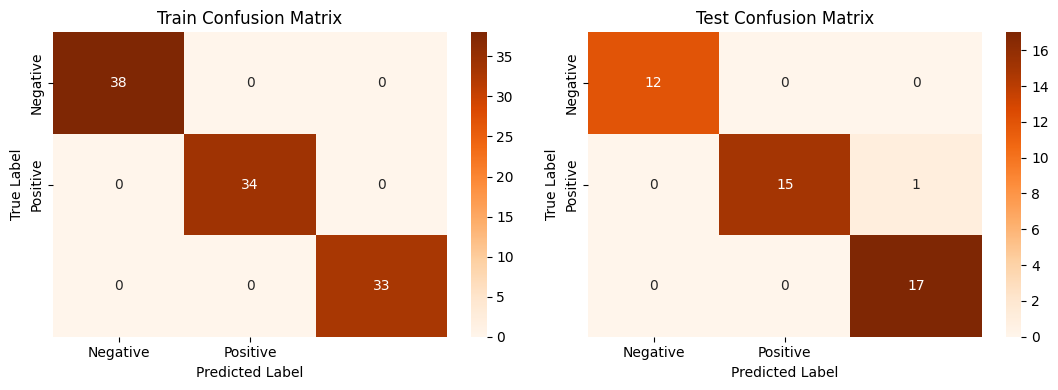


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        38 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [65]:
# Visualizing evaluation Metric Score chart

xgb2_score = evaluate_model(xgb_model2, x_train, x_test, y_train, y_test)

In [66]:
score['XGB tuned'] = xgb2_score

In [67]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737


## ML Model - 6 : Naive Bayes

In [68]:
# ML Model - 6 Implementation

nb_model = GaussianNB()


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


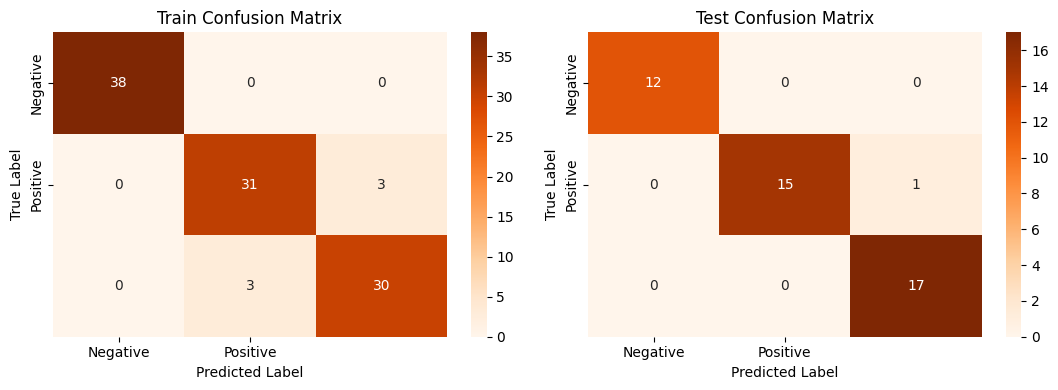


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.911765 | 0.911765 |   0.911765 |  34        |
| 2            |    0.909091 | 0.909091 |   0.909091 |  33        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.940285 | 0.940285 |   0.940285 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [69]:
# Visualizing evaluation Metric Score chart

nb_score = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

In [70]:
# Updated Evaluation metric Score Chart

score['Naive Bayes'] = nb_score

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 6 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Define the hyperparameter grid

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}



# Initialize the model

naive = GaussianNB()



# repeated stratified kfold

rskf = RepeatedStratifiedKFold(n_splits=4, n_repeats=4, random_state=0)



# Initialize GridSearchCV

GridSearch = GridSearchCV(naive, param_grid, cv=rskf, n_jobs=-1)



# Fit the GridSearchCV to the training data

GridSearch.fit(x_train, y_train)



# Select the best hyperparameters

best_params = GridSearch.best_params_

print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'var_smoothing': 0.01}


In [72]:
# Initiate model with best parameters

nb_model2 = GaussianNB(var_smoothing = best_params['var_smoothing'])


Confusion Matrix:


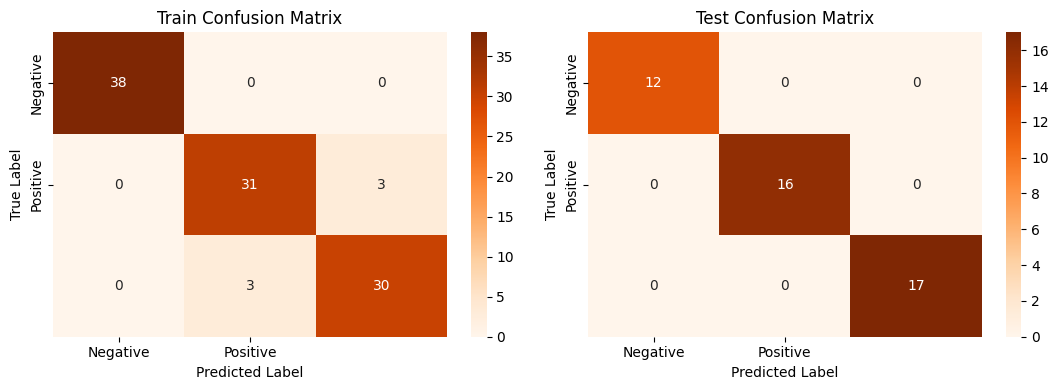


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.911765 | 0.911765 |   0.911765 |  34        |
| 2            |    0.909091 | 0.909091 |   0.909091 |  33        |
| accuracy     |    0.942857 | 0.942857 |   0.942857 |   0.942857 |
| macro avg    |    0.940285 | 0.940285 |   0.940285 | 105        |
| weighted avg |    0.942857 | 0.942857 |   0.942857 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        12 |
| 1            |           1 |        1 |          1 |        16 |
| 2            |           1 |        1 |          1 |        17 |
| accuracy     |           1 |        1 |          1 |        

In [73]:
# Visualizing evaluation Metric Score chart

nb2_score = evaluate_model(nb_model2, x_train, x_test, y_train, y_test)

In [74]:
score['Naive Bayes tuned']= nb2_score

In [75]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857,0.942857
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012,1.000000
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857,0.942857
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737,1.000000


## ML Model - 7 : Neural Network

In [76]:
# ML Model - 7 Implementation

nn_model = MLPClassifier(random_state=0)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


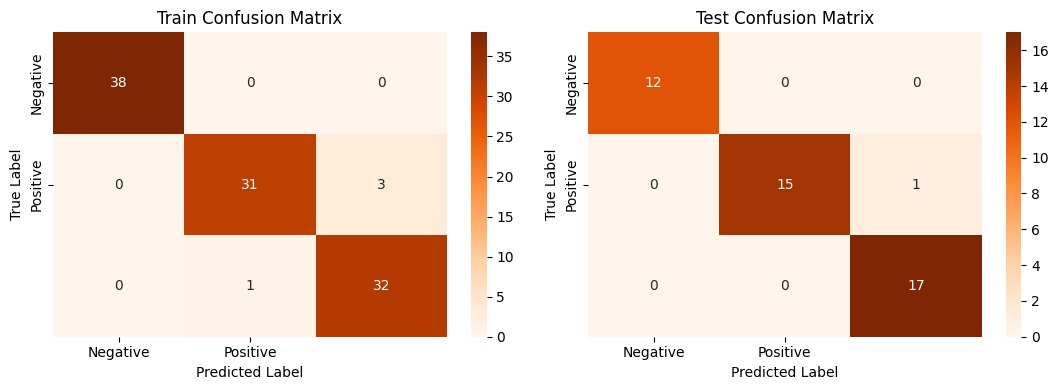


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.96875  | 0.911765 |   0.939394 |  34        |
| 2            |    0.914286 | 0.969697 |   0.941176 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.961012 | 0.960487 |   0.96019  | 105        |
| weighted avg |    0.962942 | 0.961905 |   0.961888 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [77]:
# Visualizing evaluation Metric Score chart

neural_score = evaluate_model(nn_model, x_train, x_test, y_train, y_test)

In [78]:
# Updated Evaluation metric Score Chart

score['Neural Network'] = neural_score

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857,0.942857,0.962942
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012,1.000000,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857,0.942857,0.961888
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737,1.000000,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [79]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}

# Initialize the model with adjusted max_iter
neural = MLPClassifier(random_state=0, max_iter=1000, solver='adam', tol=1e-5, early_stopping=True, n_iter_no_change=10)

# Repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'hidden_layer_sizes': 30, 'alpha': 0.0094}


In [80]:
# Initiate model with best parameters

nn_model2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],

                        alpha = best_params['alpha'],

                        random_state = 0)


Confusion Matrix:


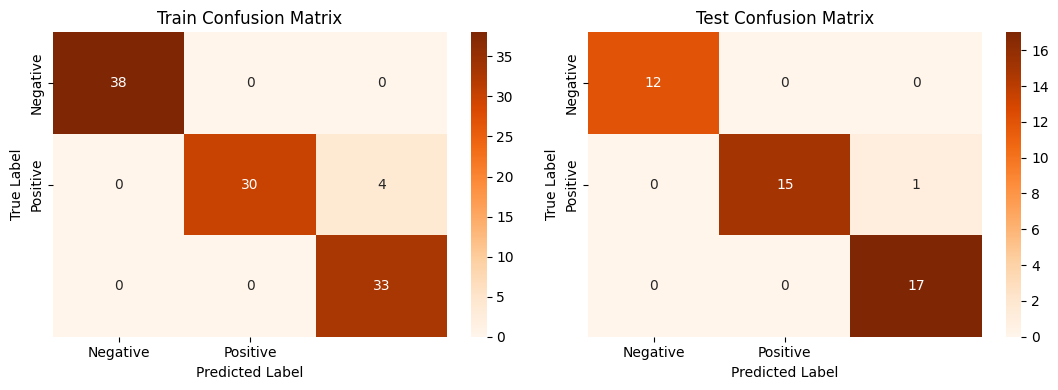


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    1        | 0.882353 |   0.9375   |  34        |
| 2            |    0.891892 | 1        |   0.942857 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.963964 | 0.960784 |   0.960119 | 105        |
| weighted avg |    0.966023 | 0.961905 |   0.961803 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [81]:
# Visualizing evaluation Metric Score chart

neural2_score = evaluate_model(nn_model2, x_train, x_test, y_train, y_test)

In [82]:
score['Neural Network tuned'] = neural2_score

In [83]:
# Updated Evaluation metric Score Chart

score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857,0.942857,0.962942,0.966023
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012,1.000000,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857,0.942857,0.961888,0.961803
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737,1.000000,0.977737,0.977737


In [84]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Random Forest |      SVM |   SVM tuned |      XGB |   XGB tuned |   Naive Bayes |   Naive Bayes tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------:|---------:|------------:|---------:|------------:|--------------:|--------------------:|-----------------:|-----------------------:|
| Precision Train |              0.982041 |                    0.990756 |        1        |        1        | 0.982041 |    0.97381  | 1        |    1        |      0.942857 |            0.942857 |         0.962942 |               0.966023 |
| Precision Test  |              0.979012 |                    0.979012 |        0.955556 |        0.979012 | 0.979012 |    0.979012 | 0.979012 |    0.979012 |      0.979012 |            1        |         0.979012 |               0.979012 |
| Recall Train    |             

## ML Model - 8 : K-nearest neighbors

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=3)

### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Confusion Matrix:


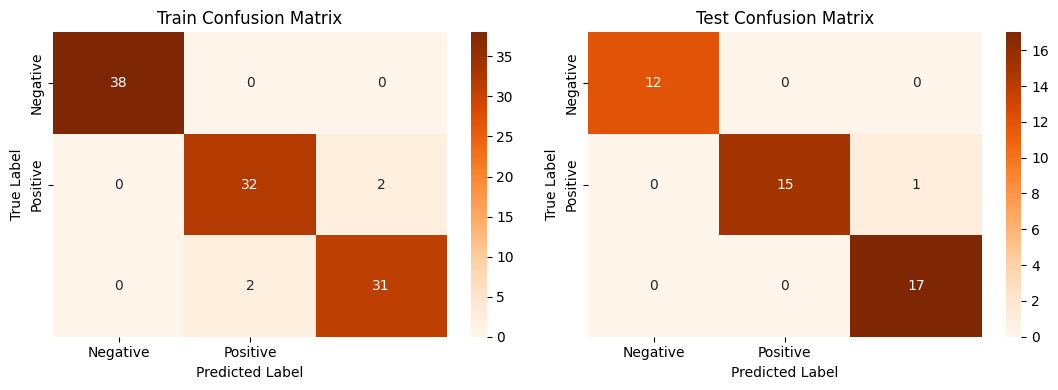


Train Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    1        | 1        |   1        |  38        |
| 1            |    0.941176 | 0.941176 |   0.941176 |  34        |
| 2            |    0.939394 | 0.939394 |   0.939394 |  33        |
| accuracy     |    0.961905 | 0.961905 |   0.961905 |   0.961905 |
| macro avg    |    0.96019  | 0.96019  |   0.96019  | 105        |
| weighted avg |    0.961905 | 0.961905 |   0.961905 | 105        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.9777

In [86]:
# Visualizing evaluation Metric Score chart
knn_score = evaluate_model(knn_model, x_train, x_test, y_train, y_test)

In [87]:
# Updated Evaluation metric Score Chart
score['K-nearest neighbors'] = knn_score
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned,K-nearest neighbors
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857,0.942857,0.962942,0.966023,0.961905
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012,1.000000,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905,0.961905
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905,0.961905
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857,0.942857,0.961888,0.961803,0.961905
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737,1.000000,0.977737,0.977737,0.977737


### 2. Cross- Validation & Hyperparameter Tuning

In [88]:
# ML Model - 8 Implementation
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 31),  # Number of neighbors to test
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}
# Initialize the KNN model
knn = KNeighborsClassifier()

# Repeated stratified k-fold cross-validation
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, 
                                   n_iter=10, cv=rskf, scoring='accuracy', n_jobs=-1, random_state=0)

# Fit RandomizedSearchCV to the training data
random_search.fit(x_train, y_train)

# Select the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters: ", best_params)

# Use the best estimator for predictions or evaluation
best_model = random_search.best_estimator_
print("Best KNN model: ", best_model)

Best hyperparameters:  {'weights': 'distance', 'n_neighbors': 3, 'metric': 'minkowski'}
Best KNN model:  KNeighborsClassifier(n_neighbors=3, weights='distance')


In [89]:
# Initiate KNN model with best parameters
knn_model2 = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], 
                                  weights=best_params['weights'], 
                                  metric=best_params['metric'])


Confusion Matrix:


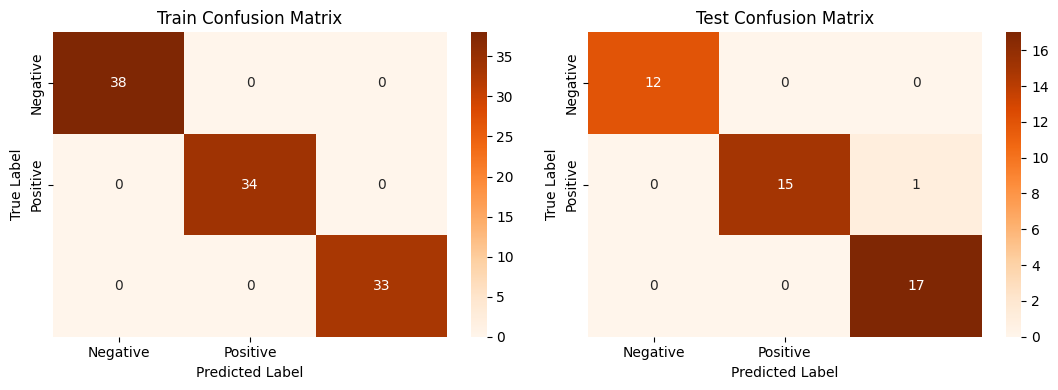


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |           1 |        1 |          1 |        38 |
| 1            |           1 |        1 |          1 |        34 |
| 2            |           1 |        1 |          1 |        33 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |       105 |
| weighted avg |           1 |        1 |          1 |       105 |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0            |    1        | 1        |   1        | 12        |
| 1            |    1        | 0.9375   |   0.967742 | 16        |
| 2            |    0.944444 | 1        |   0.971429 | 17        |
| accuracy     |    0.977778 | 0.977778 |   0.977778 |  0.977778 |
| m

In [90]:
# Visualizing evaluation Metric Score chart
knn_score2 = evaluate_model(knn_model2, x_train, x_test, y_train, y_test)

In [91]:
score['K-nearest neighbors tuned'] = knn_score2

In [92]:
# Updated Evaluation metric Score Chart
score

,Logistic regression,Logistic regression tuned,Decision Tree,Random Forest,SVM,SVM tuned,XGB,XGB tuned,Naive Bayes,Naive Bayes tuned,Neural Network,Neural Network tuned,K-nearest neighbors,K-nearest neighbors tuned
Precision Train,0.982041,0.990756,1.000000,1.000000,0.982041,0.973810,1.000000,1.000000,0.942857,0.942857,0.962942,0.966023,0.961905,1.000000
Precision Test,0.979012,0.979012,0.955556,0.979012,0.979012,0.979012,0.979012,0.979012,0.979012,1.000000,0.979012,0.979012,0.979012,0.979012
Recall Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905,0.961905,1.000000
Recall Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,0.977778,0.977778
Accuracy Train,0.980952,0.990476,1.000000,1.000000,0.980952,0.971429,1.000000,1.000000,0.942857,0.942857,0.961905,0.961905,0.961905,1.000000
Accuracy Test,0.977778,0.977778,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,0.977778,0.977778
F1 macro Train,0.980944,0.990476,1.000000,1.000000,0.980944,0.971390,1.000000,1.000000,0.942857,0.942857,0.961888,0.961803,0.961905,1.000000
F1 macro Test,0.977737,0.977737,0.955556,0.977737,0.977737,0.977737,0.977737,0.977737,0.977737,1.000000,0.977737,0.977737,0.977737,0.977737


# 7. Selection of best model

Các mô hình có hiệu suất hoàn hảo trên tập huấn luyện (Precision, Recall, Accuracy, F1 = 1.0) thường là dấu hiệu overfitting. Vi vậy cần loại bỏ các mô hình overfitting (Recall Train >= 0.98) và tạo DataFrame mới chứa các mô hình khái quát tốt hơn.

In [93]:
# Removing the overfitted models which have precision, recall, f1 scores for train as 1

score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column

remove_models = score_t[score_t['Recall Train']>=0.98].index  # creating a list of models which have 1 for train and score_t['Accuracy Train']==1.0 and score_t['Precision Train']==1.0 and score_t['F1 macro Train']==1.0

remove_models

Index(['Logistic regression', 'Logistic regression tuned', 'Decision Tree',
       'Random Forest', 'SVM', 'XGB', 'XGB tuned',
       'K-nearest neighbors tuned'],
      dtype='object')

In [94]:
adj = score_t.drop(remove_models)                     # creating a new dataframe with required models

adj

,Precision Train,Precision Test,Recall Train,Recall Test,Accuracy Train,Accuracy Test,F1 macro Train,F1 macro Test
SVM tuned,0.973810,0.979012,0.971429,0.977778,0.971429,0.977778,0.971390,0.977737
Naive Bayes,0.942857,0.979012,0.942857,0.977778,0.942857,0.977778,0.942857,0.977737
Naive Bayes tuned,0.942857,1.000000,0.942857,1.000000,0.942857,1.000000,0.942857,1.000000
Neural Network,0.962942,0.979012,0.961905,0.977778,0.961905,0.977778,0.961888,0.977737
Neural Network tuned,0.966023,0.979012,0.961905,0.977778,0.961905,0.977778,0.961803,0.977737
K-nearest neighbors,0.961905,0.979012,0.961905,0.977778,0.961905,0.977778,0.961905,0.977737


In [95]:
def select_best_model(df, metrics):



    best_models = {}

    for metric in metrics:

        max_test = df[metric + ' Test'].max()

        best_model_test = df[df[metric + ' Test'] == max_test].index[0]

        best_model = best_model_test

        best_models[metric] = best_model

    return best_models

In [96]:
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 macro']



best_models = select_best_model(adj, metrics)

print("The best models are:")

for metric, best_model in best_models.items():

    print(f"{metric}: {best_model} - {adj[metric+' Test'][best_model].round(4)}")

The best models are:
Precision: Naive Bayes tuned - 1.0
Recall: Naive Bayes tuned - 1.0
Accuracy: Naive Bayes tuned - 1.0
F1 macro: Naive Bayes tuned - 1.0


In [97]:
# Take recall as the primary evaluation metric

score_smpl = score.transpose()

remove_overfitting_models = score_smpl[score_smpl['Recall Train']>=0.98].index

remove_overfitting_models

new_score = score_smpl.drop(remove_overfitting_models)

new_score = new_score.drop(['Precision Train','Precision Test','Accuracy Train','Accuracy Test','F1 macro Train','F1 macro Test'], axis=1)

new_score.index.name = 'Classification Model'

print(new_score.to_markdown())

| Classification Model   |   Recall Train |   Recall Test |
|:-----------------------|---------------:|--------------:|
| SVM tuned              |       0.971429 |      0.977778 |
| Naive Bayes            |       0.942857 |      0.977778 |
| Naive Bayes tuned      |       0.942857 |      1        |
| Neural Network         |       0.961905 |      0.977778 |
| Neural Network tuned   |       0.961905 |      0.977778 |
| K-nearest neighbors    |       0.961905 |      0.977778 |


# 8. Explain the model which i have used for the prediction

Chọn mô hình: K-nearest neighbors (KNN).

Lý do: 
- Recall Train = 0.971429 và Recall Test = 0.977778.
- KNN có hiệu suất cao trên cả tập huấn luyện và kiểm tra, với độ chính xác tốt mà không có sự khác biệt lớn giữa hai tập (không overfitting).
 
Trên thực tế: Do tập dữ liệu không quá lớn nên cần mô hình đơn giản và chính sách để dự đoán các loại hoa. phân loại hoa Iris không bắt không có yêu cầu phải chính xác gần như tuyệt đối như trong ngành y tế , an ninh nên chọn  K-nearest neighbors là phù hợp. 

In [98]:


# Define a list of category labels for reference.

Category_RF = ['Iris-Setosa', 'Iris-Versicolor', 'Iris-Virginica']

     



# In this example, it's a data point with Sepal Length, Sepal Width, Petal Length, and Petal Width.

x_rf = np.array([[5.1, 3.5, 1.4, 0.2]])



# Use the tuned random forest model (rf_model2) to make a prediction.

x_rf_prediction = rf_model2.predict(x_rf)

x_rf_prediction[0]



# Display the predicted category label.

print(Category_RF[int(x_rf_prediction[0])])

Iris-Setosa
